In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def ideallowpass(image, D0):
    FT_img = np.fft.fft2(image)
    FT_img = np.fft.fftshift(FT_img)
    R, C = image.shape[:2]
    filter = np.zeros((R, C))
    
    for i in range(R):
        for j in range(C):
            dis = np.sqrt(((i-(R/2))**2) + ((j-(C/2))**2))
            if dis <= D0:
                filter[i, j] = 1
            else:
                filter[i, j] = 0

    G = filter * FT_img
    output_img = np.fft.ifftshift(G)
    output_img = np.fft.ifft2(output_img)
    output_img = np.abs(output_img)
    output_img = np.log(1 + output_img)
    output_img = cv2.normalize(output_img, None, 0, 255, cv2.NORM_MINMAX)
    
    return output_img

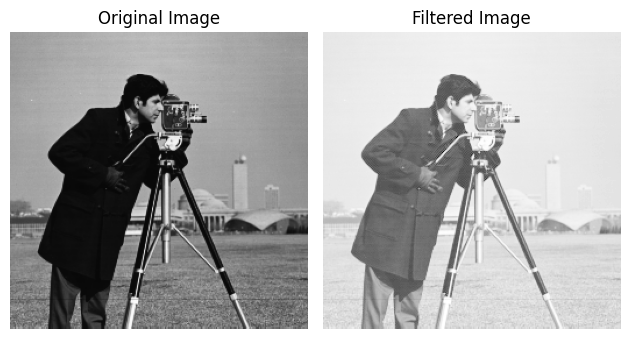

In [3]:
# Read the image
image = cv2.imread('cameraman.png')

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Specify the cutoff frequency D0
D0 = 150

# Apply low-pass filtering using ideallowpass function
filtered_image = ideallowpass(gray_image, D0)

# Display the original image and the filtered image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image')
plt.axis('off')

plt.tight_layout()
plt.show()